# Notebook to generate power dynamic words plot

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

In [3]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

prop = fm.FontProperties(fname='../../../font/cmunrm.ttf')

### Data

In [4]:
mean_similarity_df = pd.read_pickle("../../data/similarity_df_mean.pkl")

### Cluster map

<Figure size 640x480 with 0 Axes>

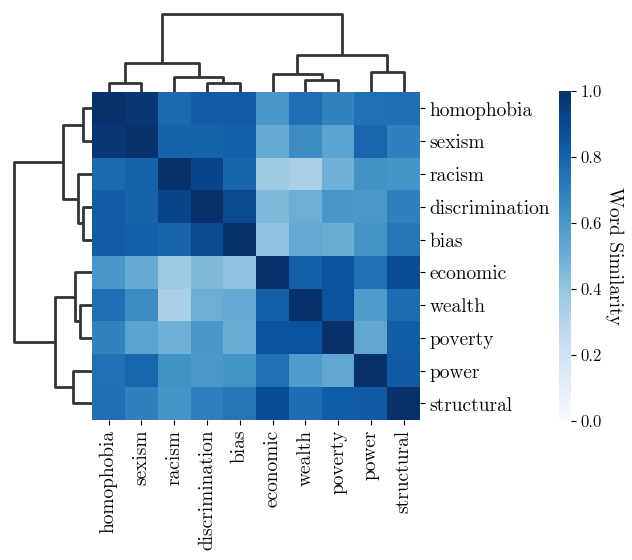

In [12]:
color_intervals = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
fig = plt.figure(1)
interested_words = ["homophobia", "sexism", "racism", 
                    "discrimination", 
                    "bias", "economic", 
                    "wealth", "poverty", "power", "structural",
                    # "mortality", "morbidity",
                    # "environmental",
                    # "biological",
                    # "ethnicity",
                    # "class"
                   ]

interested_words_2 = ["racism", 
                    "discrimination", 
                    "economic", 
                    "mortality",
                    "poverty",
                    "power",
                    "bias",
                    "structural",
                    "class",
                    "environmental",
                    "stress",
                    "biological",
                    "stigma",
                    "cardiovascular_disease",
                    "wealth",
                    "systemic",
                    "segregation",
                    "sexism",
                    "infant_mortality",
                    "food_security",
                      "homophobia"
                   ]
# Create a clustermap with custom color intervals and ensure 0 and 1 are included in the colorbar
cbar_kws = {'ticks': color_intervals, 'label': 'Word Similarity', 'orientation': 'vertical'}

cluster_plot = sns.clustermap(mean_similarity_df.loc[interested_words, interested_words],
               cmap="Blues", cbar_kws=cbar_kws, cbar_pos= (0.95,  0.28, 0.02, 0.55), vmin=0, vmax=1,
               method = "ward", figsize=(6,6));


for ax in [cluster_plot.ax_row_dendrogram, cluster_plot.ax_col_dendrogram]:
    for line in ax.collections:
        line.set_linewidth(2)  

# ## not sure what you mean. by this but?
# plt.setp(cluster_plot.ax_heatmap.collections[0].colorbar.ax.get_yticklabels(), rotation=90)

cbar = cluster_plot.ax_heatmap.collections[0].colorbar
cbar.ax.set_ylabel('Word Similarity', rotation=270, labelpad=15, 
                   # rotation=90,
                   fontproperties=prop)

for tick in cbar.ax.yaxis.get_ticklabels():
    tick.set_fontproperties(prop)
    tick.set_fontsize(12)

# plt.title('Qualifying language similarity', fontproperties=prop, size=BIGGER_SIZE, pad=20)

for tick in cluster_plot.ax_heatmap.get_xticklabels():
    tick.set_fontproperties(prop)
    tick.set_fontsize(SMALL_SIZE)  # Set the font size

for tick in cluster_plot.ax_heatmap.get_yticklabels():
    tick.set_fontproperties(prop)
    tick.set_fontsize(SMALL_SIZE)  # Set the font size

cluster_plot.savefig('../../results/figures/racism_language_power_dynamics.png')

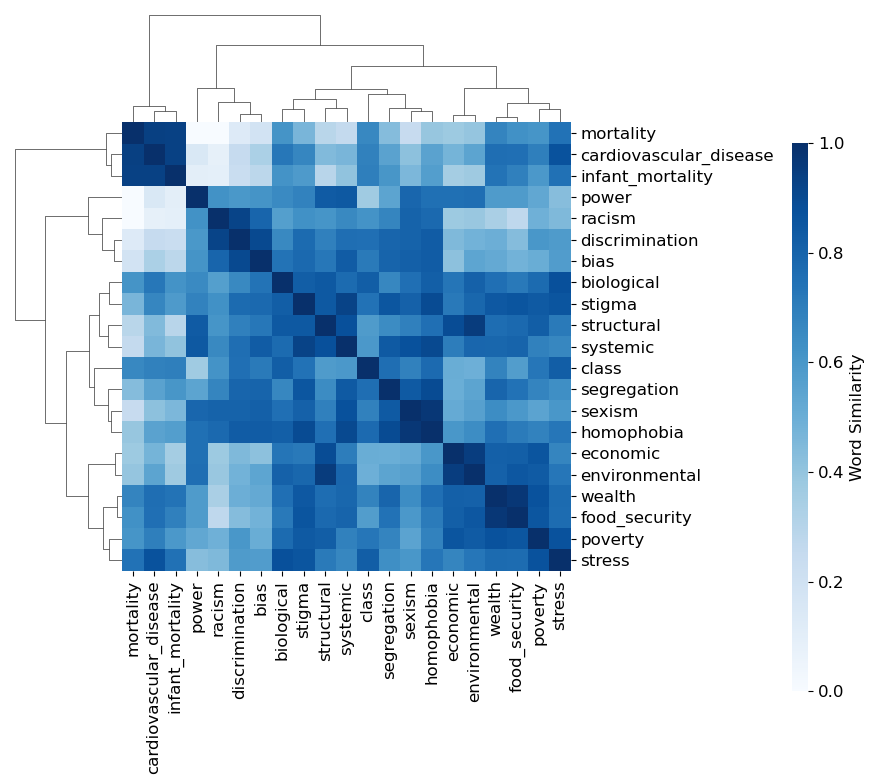

In [111]:
cluster_plot = sns.clustermap(mean_similarity_df.loc[interested_words_2, interested_words_2],
               cmap="Blues", cbar_kws=cbar_kws, cbar_pos= (1,  0.126, 0.02, 0.685), vmin=0, vmax=1,
               method = "ward", figsize=(8,8));

cluster_plot.savefig('../../results/figures/racism_language_power_dynamics_2.png')

In [112]:
mean_similarity_df.loc[interested_words, interested_words]

,homophobia,sexism,racism,discrimination,bias,economic,wealth,poverty,power,structural
homophobia,1.000000,0.971687,0.777513,0.831985,0.830161,0.601612,0.756763,0.685137,0.751498,0.757533
sexism,0.971687,1.000000,0.802150,0.803540,0.813247,0.517130,0.641764,0.548324,0.791468,0.694375
racism,0.777513,0.802150,1.000000,0.925712,0.796536,0.375638,0.339712,0.489780,0.624401,0.611651
discrimination,0.831985,0.803540,0.925712,1.000000,0.905339,0.450880,0.497854,0.602895,0.598425,0.694319
bias,0.830161,0.813247,0.796536,0.905339,1.000000,0.416144,0.519921,0.504902,0.614164,0.724387
economic,0.601612,0.517130,0.375638,0.450880,0.416144,1.000000,0.814558,0.858464,0.752712,0.893541
wealth,0.756763,0.641764,0.339712,0.497854,0.519921,0.814558,1.000000,0.870368,0.583258,0.764660
poverty,0.685137,0.548324,0.489780,0.602895,0.504902,0.858464,0.870368,1.000000,0.527464,0.821073
power,0.751498,0.791468,0.624401,0.598425,0.614164,0.752712,0.583258,0.527464,1.000000,0.835363
structural,0.757533,0.694375,0.611651,0.694319,0.724387,0.893541,0.764660,0.821073,0.835363,1.000000
